In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [205]:
CarPrice = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
CarPrice.head()

In [ ]:
CarPrice.shape

In [ ]:
CarPrice.describe()

In [ ]:
CarPrice.info()

In [ ]:
CarPrice['CarName'].unique()

In [206]:
CarPrice.CarName.str.replace('audi 100ls','audi 100 ls')
CarPrice.CarName.str.replace('maxda','mazda')
CarPrice.CarName.str.replace('Nissan','nissan')
CarPrice.CarName.str.replace('porcshce','porsche')
CarPrice.CarName.str.replace('toyouta','toyota')
CarPrice.CarName.str.replace('vokswagen','volkswagen')
CarPrice.CarName.str.replace('vw','volkswagen')

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [ ]:
CarPrice.corr()

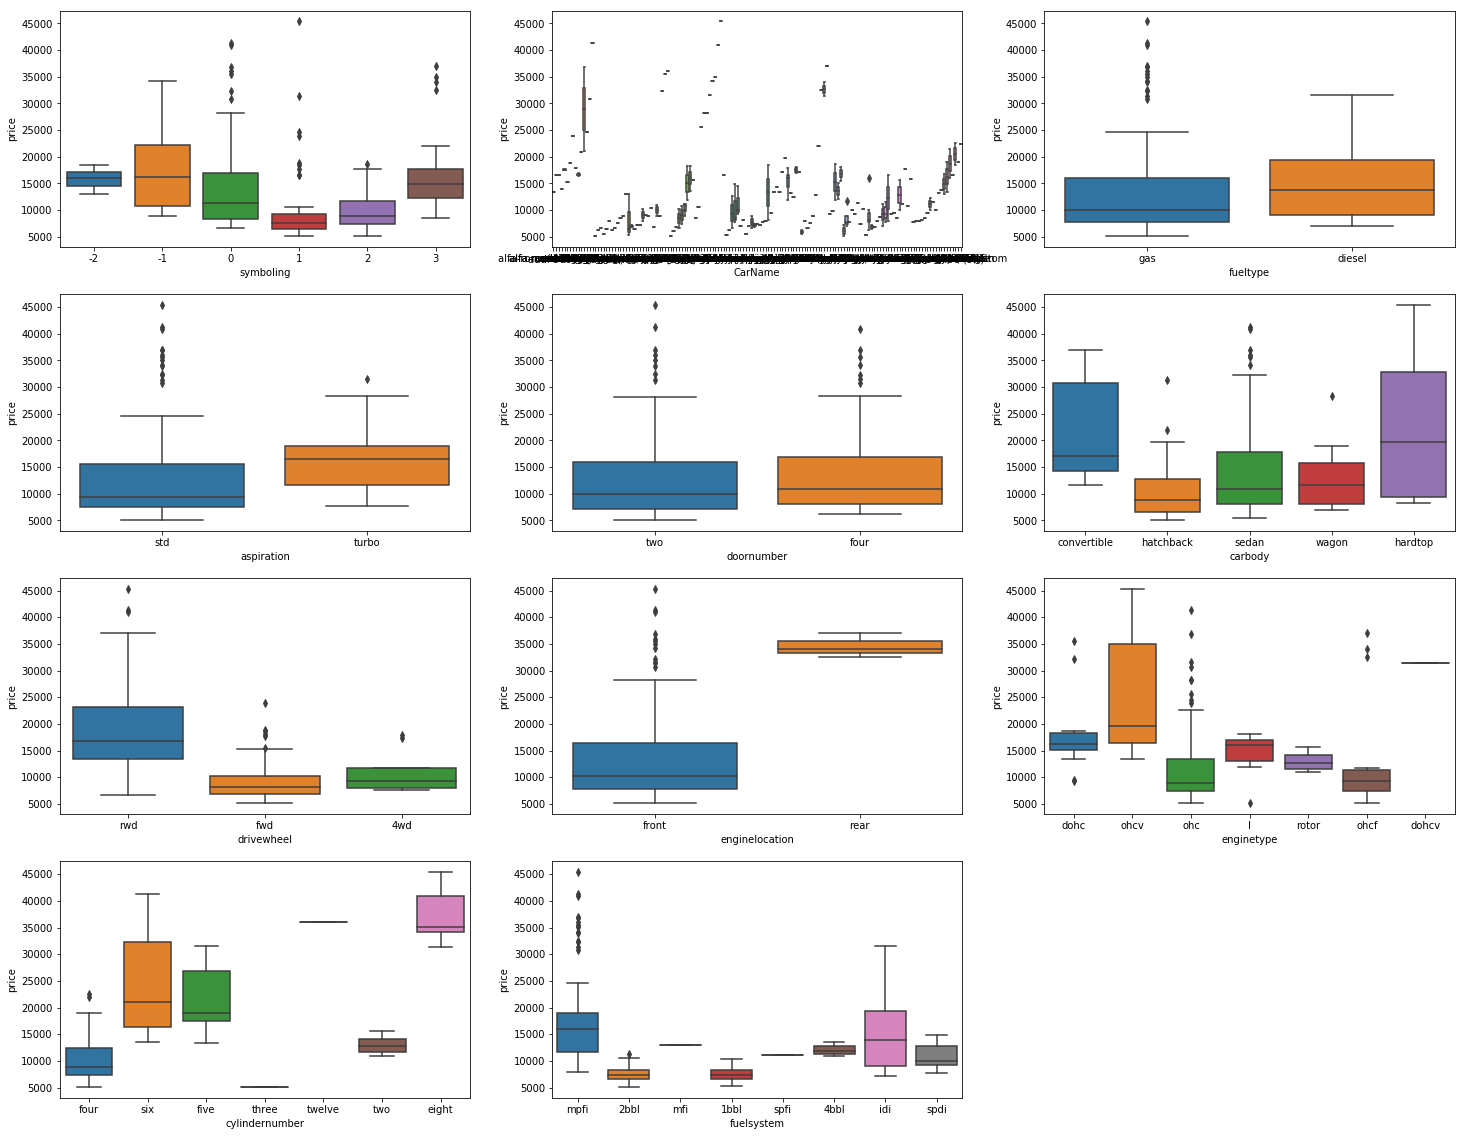

In [207]:
plt.figure(figsize=(25, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.subplot(4,3,2)
sns.boxplot(x = 'CarName', y = 'price', data = CarPrice)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)

plt.show()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(CarPrice.corr(), annot = True)
plt.show()

In [208]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [209]:
CarPrice['symboling'] = le.fit_transform(CarPrice['symboling'])
CarPrice['CarName'] = le.fit_transform(CarPrice['CarName'])
CarPrice['fueltype'] = le.fit_transform(CarPrice['fueltype'])
CarPrice['aspiration'] = le.fit_transform(CarPrice['aspiration'])
CarPrice['doornumber'] = le.fit_transform(CarPrice['doornumber'])
CarPrice['carbody'] = le.fit_transform(CarPrice['carbody'])
CarPrice['drivewheel'] = le.fit_transform(CarPrice['drivewheel'])
CarPrice['enginelocation'] = le.fit_transform(CarPrice['enginelocation'])
CarPrice['enginetype'] = le.fit_transform(CarPrice['enginetype'])
CarPrice['cylindernumber'] = le.fit_transform(CarPrice['cylindernumber'])
CarPrice['fuelsystem'] = le.fit_transform(CarPrice['fuelsystem'])

In [210]:
from sklearn.model_selection import train_test_split

CarPrice_train, CarPrice_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [211]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [212]:
num_vars = ['price','wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize' , 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

CarPrice_train[num_vars] = scaler.fit_transform(CarPrice_train[num_vars])

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gupta\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
CarPrice_train.head()

In [ ]:
CarPrice_train.describe()

In [213]:
y_train = CarPrice_train.pop('price')
X_train = CarPrice_train

In [214]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [215]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 6),
 ('symboling', True, 1),
 ('CarName', False, 5),
 ('fueltype', True, 1),
 ('aspiration', False, 4),
 ('doornumber', False, 2),
 ('carbody', True, 1),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginetype', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('fuelsystem', False, 3),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1)]

In [216]:
col = X_train.columns[rfe.support_]

In [217]:
X_train_rfe = X_train[col]

In [218]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [219]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [220]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     39.72
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.03e-44
Time:                        22:42:57   Log-Likelihood:                 161.12
No. Observations:                 143   AIC:                            -280.2
Df Residuals:                     122   BIC:                            -218.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0208      0.255      0.082      0.935      -0.485       0.527
symboling            0.0051      0.009      0.542      0.589      -0.013       0.024
fueltype            -0.2057      0.212     -0.970      0.334      -0.626       0.214
carbody             -0.0098      0.014     -0.723      0.471      -0.037       0.017
drivewheel           0.0385      0.020      1.948      0.054      -0.001       0.078
enginelocation       0.3126      0.099      3.166      0.002       0.117       0.508
wheelbase            0.0405      0.116      0.348      0.728      -0.190       0.271
carlength           -0.0742      0.123     -0.604      0.547      -0.317       0.169
carwidth             0.2957      0.130      2.280      0.024       0.039       0.552
carheight            0.0585      0.057      1.032      0.304      -0.054       0.171
curbweight           0.2705      0.153      1.766      0.080      -0.033       0.574
enginetype           0.0053      0.008      0.623      0.535      -0.012       0.022
cylindernumber       0.0068      0.013      0.537      0.592      -0.018       0.032
enginesize           0.6143      0.153      4.023      0.000       0.312       0.917
boreratio           -0.0979      0.053     -1.831      0.069      -0.204       0.008
stroke              -0.1370      0.064     -2.137      0.035      -0.264      -0.010
compressionratio    -0.2067      0.254     -0.814      0.417      -0.710       0.296
horsepower           0.1126      0.143      0.789      0.432      -0.170       0.395
peakrpm              0.0867      0.058      1.499      0.136      -0.028       0.201
citympg             -0.1024      0.214     -0.479      0.633      -0.525       0.321
highwaympg           0.1296      0.201      0.644      0.521      -0.269       0.528
==============================================================================
Omnibus:                       42.605   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.096
Skew:                           0.983   Prob(JB):                     2.12e-39
Kurtosis:                       8.101   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [222]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,147.87
19,highwaympg,139.32
18,citympg,134.10
6,carlength,95.03
9,curbweight,86.98
7,carwidth,75.38
5,wheelbase,52.77
15,compressionratio,31.29
12,enginesize,31.07
16,horsepower,29.87


In [223]:
X_train_rfe_2 = X_train_rfe.drop(['boreratio'], axis=1)
#X_train_rfe = X_train[col]

In [224]:
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)

In [225]:
X_train_rfe_2 = X_train_rfe_2.drop(['const'], axis=1)

#X_train_rfe_2.columns

In [226]:
lm_2 = sm.OLS(y_train,X_train_rfe_2).fit()   # Running the linear model

In [227]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              90.71
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    2.75e-63
Time:                        22:42:58   Log-Likelihood:                          159.08
No. Observations:                 143   AIC:                                     -280.2
Df Residuals:                     124   BIC:                                     -223.9
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0038      0.009      0.426      0.671      -0.014       0.021
fueltype            -0.2183      0.090     -2.430      0.017      -0.396      -0.041
carbody             -0.0101      0.014     -0.742      0.459      -0.037       0.017
drivewheel           0.0350      0.020      1.772      0.079      -0.004       0.074
enginelocation       0.2905      0.099      2.946      0.004       0.095       0.486
wheelbase            0.0472      0.113      0.418      0.677      -0.176       0.271
carlength           -0.1153      0.122     -0.948      0.345      -0.356       0.125
carwidth             0.2820      0.125      2.262      0.025       0.035       0.529
carheight            0.0622      0.057      1.091      0.277      -0.051       0.175
curbweight           0.2536      0.145      1.753      0.082      -0.033       0.540
enginetype           0.0044      0.008      0.542      0.589      -0.012       0.020
cylindernumber       0.0082      0.012      0.704      0.483      -0.015       0.031
enginesize           0.6327      0.138      4.569      0.000       0.359       0.907
stroke              -0.1061      0.051     -2.069      0.041      -0.208      -0.005
compressionratio    -0.2213      0.130     -1.697      0.092      -0.479       0.037
horsepower           0.0914      0.138      0.660      0.510      -0.183       0.365
peakrpm              0.1109      0.056      1.986      0.049       0.000       0.221
citympg             -0.0556      0.210     -0.264      0.792      -0.472       0.361
highwaympg           0.0858      0.200      0.429      0.669      -0.310       0.481
==============================================================================
Omnibus:                       38.577   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.797
Skew:                           0.934   Prob(JB):                     1.97e-30
Kurtosis:                       7.412   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
vif_2 = pd.DataFrame()
X_2 = X_train_rfe_2
vif_2['Features'] = X_2.columns
vif_2['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
1,fueltype,143.78
18,highwaympg,137.58
17,citympg,132.46
6,carlength,92.06
9,curbweight,86.46
7,carwidth,75.22
5,wheelbase,52.75
12,enginesize,30.81
14,compressionratio,30.75
15,horsepower,29.61


In [229]:
# As Symboling has high p-value and high VIF, removing the column

In [230]:
X_train_rfe_3 = X_train_rfe_2.drop(['symboling'], axis=1)
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
X_train_rfe_3 = X_train_rfe_3.drop(['const'], axis=1)
lm_3 = sm.OLS(y_train,X_train_rfe_3).fit()   # Running the linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              96.37
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    3.02e-64
Time:                        22:42:58   Log-Likelihood:                          158.97
No. Observations:                 143   AIC:                                     -281.9
Df Residuals:                     125   BIC:                                     -228.6
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.2039      0.083     -2.458      0.015      -0.368      -0.040
carbody             -0.0120      0.013     -0.939      0.350      -0.037       0.013
drivewheel           0.0353      0.020      1.796      0.075      -0.004       0.074
enginelocation       0.2931      0.098      2.988      0.003       0.099       0.487
wheelbase            0.0313      0.106      0.294      0.769      -0.179       0.242
carlength           -0.1125      0.121     -0.930      0.354      -0.352       0.127
carwidth             0.2878      0.124      2.330      0.021       0.043       0.532
carheight            0.0608      0.057      1.072      0.286      -0.051       0.173
curbweight           0.2634      0.142      1.849      0.067      -0.019       0.545
enginetype           0.0041      0.008      0.515      0.608      -0.012       0.020
cylindernumber       0.0087      0.012      0.753      0.453      -0.014       0.032
enginesize           0.6214      0.135      4.587      0.000       0.353       0.890
stroke              -0.1023      0.050     -2.033      0.044      -0.202      -0.003
compressionratio    -0.2058      0.125     -1.649      0.102      -0.453       0.041
horsepower           0.0881      0.138      0.639      0.524      -0.185       0.361
peakrpm              0.1114      0.056      2.003      0.047       0.001       0.222
citympg             -0.0599      0.209     -0.286      0.775      -0.474       0.354
highwaympg           0.0872      0.199      0.438      0.662      -0.307       0.481
==============================================================================
Omnibus:                       38.567   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.009
Skew:                           0.942   Prob(JB):                     7.95e-30
Kurtosis:                       7.352   Cond. No.                         208.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
vif_3 = pd.DataFrame()
X_3 = X_train_rfe_3
vif_3['Features'] = X_3.columns
vif_3['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
vif_3

,Features,VIF
17,highwaympg,137.54
16,citympg,132.15
0,fueltype,123.34
5,carlength,91.80
8,curbweight,84.31
6,carwidth,74.33
4,wheelbase,46.97
11,enginesize,29.68
14,horsepower,29.52
13,compressionratio,28.36


In [232]:
X_train_rfe_4 = X_train_rfe_3.drop(['carlength'], axis=1)
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
X_train_rfe_4 = X_train_rfe_4.drop(['const'], axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe_4).fit()   # Running the linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              102.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    4.50e-65
Time:                        22:42:59   Log-Likelihood:                          158.48
No. Observations:                 143   AIC:                                     -283.0
Df Residuals:                     126   BIC:                                     -232.6
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.2308      0.078     -2.972      0.004      -0.385      -0.077
carbody             -0.0161      0.012     -1.345      0.181      -0.040       0.008
drivewheel           0.0347      0.020      1.767      0.080      -0.004       0.074
enginelocation       0.2844      0.098      2.914      0.004       0.091       0.478
wheelbase            0.0069      0.103      0.067      0.947      -0.197       0.211
carwidth             0.2489      0.116      2.142      0.034       0.019       0.479
carheight            0.0537      0.056      0.956      0.341      -0.057       0.165
curbweight           0.2372      0.140      1.699      0.092      -0.039       0.513
enginetype           0.0062      0.008      0.811      0.419      -0.009       0.021
cylindernumber       0.0078      0.012      0.674      0.502      -0.015       0.031
enginesize           0.6081      0.135      4.516      0.000       0.342       0.875
stroke              -0.0999      0.050     -1.990      0.049      -0.199      -0.001
compressionratio    -0.2381      0.120     -1.986      0.049      -0.475      -0.001
horsepower           0.1203      0.133      0.903      0.368      -0.143       0.384
peakrpm              0.1187      0.055      2.156      0.033       0.010       0.228
citympg              0.0056      0.197      0.028      0.977      -0.384       0.395
highwaympg           0.0619      0.197      0.314      0.754      -0.328       0.452
==============================================================================
Omnibus:                       32.605   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.396
Skew:                           0.831   Prob(JB):                     7.09e-22
Kurtosis:                       6.686   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
vif_4 = pd.DataFrame()
X_4 = X_train_rfe_4
vif_4['Features'] = X_4.columns
vif_4['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

,Features,VIF
16,highwaympg,134.98
15,citympg,117.18
0,fueltype,108.29
7,curbweight,81.01
5,carwidth,65.82
4,wheelbase,44.12
10,enginesize,29.35
13,horsepower,27.65
12,compressionratio,26.17
1,carbody,22.13


In [234]:
X_train_rfe_5 = X_train_rfe_4.drop(['citympg'], axis=1)
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
X_train_rfe_5 = X_train_rfe_5.drop(['const'], axis=1)
lm_5 = sm.OLS(y_train,X_train_rfe_5).fit()   # Running the linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              109.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    4.22e-66
Time:                        22:42:59   Log-Likelihood:                          158.48
No. Observations:                 143   AIC:                                     -285.0
Df Residuals:                     127   BIC:                                     -237.6
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.2305      0.077     -3.006      0.003      -0.382      -0.079
carbody             -0.0162      0.012     -1.356      0.177      -0.040       0.007
drivewheel           0.0346      0.019      1.792      0.075      -0.004       0.073
enginelocation       0.2841      0.097      2.941      0.004       0.093       0.475
wheelbase            0.0073      0.102      0.072      0.943      -0.194       0.208
carwidth             0.2486      0.115      2.160      0.033       0.021       0.476
carheight            0.0538      0.056      0.962      0.338      -0.057       0.164
curbweight           0.2370      0.139      1.706      0.090      -0.038       0.512
enginetype           0.0062      0.008      0.814      0.417      -0.009       0.021
cylindernumber       0.0078      0.011      0.676      0.500      -0.015       0.031
enginesize           0.6089      0.131      4.644      0.000       0.349       0.868
stroke              -0.1002      0.049     -2.035      0.044      -0.198      -0.003
compressionratio    -0.2374      0.117     -2.026      0.045      -0.469      -0.006
horsepower           0.1195      0.129      0.923      0.358      -0.137       0.375
peakrpm              0.1189      0.055      2.177      0.031       0.011       0.227
highwaympg           0.0669      0.094      0.708      0.480      -0.120       0.254
==============================================================================
Omnibus:                       32.562   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.195
Skew:                           0.830   Prob(JB):                     7.84e-22
Kurtosis:                       6.682   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
vif_5 = pd.DataFrame()
X_5 = X_train_rfe_5
vif_5['Features'] = X_5.columns
vif_5['VIF'] = [variance_inflation_factor(X_5.values, i) for i in range(X_5.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by = "VIF", ascending = False)
vif_5

,Features,VIF
0,fueltype,106.40
7,curbweight,80.93
5,carwidth,65.08
4,wheelbase,43.35
15,highwaympg,31.24
10,enginesize,28.05
13,horsepower,26.27
12,compressionratio,25.22
1,carbody,22.01
6,carheight,18.98


In [236]:
X_train_rfe_6 = X_train_rfe_5.drop(['wheelbase'], axis=1)
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
X_train_rfe_6 = X_train_rfe_6.drop(['const'], axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe_6).fit()   # Running the linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              117.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    3.83e-67
Time:                        22:43:00   Log-Likelihood:                          158.47
No. Observations:                 143   AIC:                                     -286.9
Df Residuals:                     128   BIC:                                     -242.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.2316      0.075     -3.089      0.002      -0.380      -0.083
carbody             -0.0159      0.011     -1.412      0.160      -0.038       0.006
drivewheel           0.0351      0.018      1.934      0.055      -0.001       0.071
enginelocation       0.2838      0.096      2.953      0.004       0.094       0.474
carwidth             0.2534      0.093      2.712      0.008       0.069       0.438
carheight            0.0552      0.052      1.063      0.290      -0.048       0.158
curbweight           0.2389      0.136      1.759      0.081      -0.030       0.508
enginetype           0.0061      0.007      0.832      0.407      -0.008       0.021
cylindernumber       0.0079      0.011      0.709      0.480      -0.014       0.030
enginesize           0.6102      0.129      4.722      0.000       0.355       0.866
stroke              -0.1001      0.049     -2.042      0.043      -0.197      -0.003
compressionratio    -0.2390      0.115     -2.084      0.039      -0.466      -0.012
horsepower           0.1154      0.116      0.997      0.321      -0.114       0.344
peakrpm              0.1190      0.054      2.189      0.030       0.011       0.227
highwaympg           0.0665      0.094      0.707      0.481      -0.119       0.252
==============================================================================
Omnibus:                       32.542   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.082
Skew:                           0.829   Prob(JB):                     8.29e-22
Kurtosis:                       6.680   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
vif_6 = pd.DataFrame()
X_6 = X_train_rfe_6
vif_6['Features'] = X_6.columns
vif_6['VIF'] = [variance_inflation_factor(X_6.values, i) for i in range(X_6.shape[1])]
vif_6['VIF'] = round(vif_6['VIF'], 2)
vif_6 = vif_6.sort_values(by = "VIF", ascending = False)
vif_6

,Features,VIF
0,fueltype,102.46
6,curbweight,78.01
4,carwidth,43.23
14,highwaympg,31.14
9,enginesize,27.47
11,compressionratio,24.33
12,horsepower,21.20
1,carbody,19.79
5,carheight,16.53
10,stroke,15.02


In [238]:
X_train_rfe_7 = X_train_rfe_6.drop(['compressionratio'], axis=1)
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
X_train_rfe_7 = X_train_rfe_7.drop(['const'], axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe_7).fit()   # Running the linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              122.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    2.83e-67
Time:                        22:43:00   Log-Likelihood:                          156.09
No. Observations:                 143   AIC:                                     -284.2
Df Residuals:                     129   BIC:                                     -242.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0865      0.028     -3.066      0.003      -0.142      -0.031
carbody           -0.0160      0.011     -1.401      0.164      -0.039       0.007
drivewheel         0.0283      0.018      1.566      0.120      -0.007       0.064
enginelocation     0.2692      0.097      2.773      0.006       0.077       0.461
carwidth           0.2100      0.092      2.276      0.024       0.027       0.392
carheight          0.0364      0.052      0.703      0.484      -0.066       0.139
curbweight         0.1426      0.129      1.102      0.273      -0.113       0.399
enginetype         0.0017      0.007      0.243      0.809      -0.012       0.016
cylindernumber     0.0008      0.011      0.071      0.944      -0.021       0.022
enginesize         0.6070      0.131      4.637      0.000       0.348       0.866
stroke            -0.1039      0.050     -2.094      0.038      -0.202      -0.006
horsepower         0.1368      0.117      1.171      0.244      -0.094       0.368
peakrpm            0.0895      0.053      1.685      0.094      -0.016       0.195
highwaympg        -0.0941      0.054     -1.728      0.086      -0.202       0.014
==============================================================================
Omnibus:                       44.872   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.235
Skew:                           1.111   Prob(JB):                     1.60e-35
Kurtosis:                       7.686   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
vif_7 = pd.DataFrame()
X_7 = X_train_rfe_7
vif_7['Features'] = X_7.columns
vif_7['VIF'] = [variance_inflation_factor(X_7.values, i) for i in range(X_7.shape[1])]
vif_7['VIF'] = round(vif_7['VIF'], 2)
vif_7 = vif_7.sort_values(by = "VIF", ascending = False)
vif_7

,Features,VIF
6,curbweight,68.99
4,carwidth,41.08
9,enginesize,27.46
11,horsepower,21.03
1,carbody,19.79
5,carheight,16.03
10,stroke,15.00
0,fueltype,14.16
2,drivewheel,12.72
8,cylindernumber,12.57


In [240]:
X_train_rfe_8 = X_train_rfe_7.drop(['cylindernumber'], axis=1)
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)
X_train_rfe_8 = X_train_rfe_8.drop(['const'], axis=1)
lm_8 = sm.OLS(y_train,X_train_rfe_8).fit()   # Running the linear model
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              132.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    2.41e-68
Time:                        22:43:00   Log-Likelihood:                          156.09
No. Observations:                 143   AIC:                                     -286.2
Df Residuals:                     130   BIC:                                     -247.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0863      0.028     -3.089      0.002      -0.142      -0.031
carbody           -0.0158      0.011     -1.418      0.159      -0.038       0.006
drivewheel         0.0289      0.016      1.797      0.075      -0.003       0.061
enginelocation     0.2691      0.097      2.783      0.006       0.078       0.460
carwidth           0.2075      0.085      2.437      0.016       0.039       0.376
carheight          0.0357      0.051      0.705      0.482      -0.065       0.136
curbweight         0.1447      0.125      1.154      0.251      -0.103       0.393
enginetype         0.0020      0.006      0.314      0.754      -0.010       0.014
enginesize         0.6048      0.127      4.774      0.000       0.354       0.855
stroke            -0.1033      0.049     -2.126      0.035      -0.199      -0.007
horsepower         0.1380      0.115      1.201      0.232      -0.089       0.365
peakrpm            0.0896      0.053      1.693      0.093      -0.015       0.194
highwaympg        -0.0939      0.054     -1.733      0.085      -0.201       0.013
==============================================================================
Omnibus:                       45.130   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.385
Skew:                           1.117   Prob(JB):                     9.03e-36
Kurtosis:                       7.700   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
vif_8 = pd.DataFrame()
X_8 = X_train_rfe_8
vif_8['Features'] = X_8.columns
vif_8['VIF'] = [variance_inflation_factor(X_8.values, i) for i in range(X_8.shape[1])]
vif_8['VIF'] = round(vif_8['VIF'], 2)
vif_8 = vif_8.sort_values(by = "VIF", ascending = False)
vif_8

,Features,VIF
6,curbweight,65.33
4,carwidth,35.29
8,enginesize,25.92
10,horsepower,20.53
1,carbody,19.10
5,carheight,15.46
9,stroke,14.48
0,fueltype,13.98
11,peakrpm,10.95
12,highwaympg,10.17


In [242]:
X_train_rfe_9 = X_train_rfe_8.drop(['enginetype'], axis=1)
X_train_rfe_9 = sm.add_constant(X_train_rfe_9)
X_train_rfe_9 = X_train_rfe_9.drop(['const'], axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe_9).fit()   # Running the linear model
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              145.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    2.05e-69
Time:                        22:43:01   Log-Likelihood:                          156.03
No. Observations:                 143   AIC:                                     -288.1
Df Residuals:                     131   BIC:                                     -252.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0837      0.027     -3.149      0.002      -0.136      -0.031
carbody           -0.0152      0.011     -1.389      0.167      -0.037       0.006
drivewheel         0.0288      0.016      1.802      0.074      -0.003       0.061
enginelocation     0.2743      0.095      2.888      0.005       0.086       0.462
carwidth           0.2143      0.082      2.610      0.010       0.052       0.377
carheight          0.0332      0.050      0.665      0.507      -0.065       0.132
curbweight         0.1457      0.125      1.165      0.246      -0.102       0.393
enginesize         0.6035      0.126      4.783      0.000       0.354       0.853
stroke            -0.1042      0.048     -2.154      0.033      -0.200      -0.009
horsepower         0.1335      0.114      1.175      0.242      -0.091       0.358
peakrpm            0.0904      0.053      1.716      0.089      -0.014       0.195
highwaympg        -0.0914      0.053     -1.711      0.089      -0.197       0.014
==============================================================================
Omnibus:                       45.195   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.498
Skew:                           1.120   Prob(JB):                     8.53e-36
Kurtosis:                       7.700   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
vif_9 = pd.DataFrame()
X_9 = X_train_rfe_9
vif_9['Features'] = X_9.columns
vif_9['VIF'] = [variance_inflation_factor(X_9.values, i) for i in range(X_9.shape[1])]
vif_9['VIF'] = round(vif_9['VIF'], 2)
vif_9 = vif_9.sort_values(by = "VIF", ascending = False)
vif_9

,Features,VIF
6,curbweight,65.30
4,carwidth,33.02
7,enginesize,25.89
9,horsepower,20.21
1,carbody,18.45
5,carheight,15.06
8,stroke,14.44
0,fueltype,12.75
10,peakrpm,10.93
2,drivewheel,10.13


In [244]:
X_train_rfe_10 = X_train_rfe_9.drop(['carheight'], axis=1)
X_train_rfe_10 = sm.add_constant(X_train_rfe_10)
X_train_rfe_10 = X_train_rfe_10.drop(['const'], axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe_10).fit()   # Running the linear model
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              158.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    1.98e-70
Time:                        22:43:02   Log-Likelihood:                          155.79
No. Observations:                 143   AIC:                                     -289.6
Df Residuals:                     132   BIC:                                     -257.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0810      0.026     -3.089      0.002      -0.133      -0.029
carbody           -0.0119      0.010     -1.222      0.224      -0.031       0.007
drivewheel         0.0280      0.016      1.759      0.081      -0.003       0.059
enginelocation     0.2886      0.092      3.125      0.002       0.106       0.471
carwidth           0.2211      0.081      2.720      0.007       0.060       0.382
curbweight         0.1760      0.116      1.516      0.132      -0.054       0.406
enginesize         0.5891      0.124      4.749      0.000       0.344       0.835
stroke            -0.1050      0.048     -2.177      0.031      -0.200      -0.010
horsepower         0.1090      0.107      1.016      0.311      -0.103       0.321
peakrpm            0.0870      0.052      1.663      0.099      -0.016       0.191
highwaympg        -0.0862      0.053     -1.636      0.104      -0.190       0.018
==============================================================================
Omnibus:                       46.961   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.160
Skew:                           1.160   Prob(JB):                     4.13e-38
Kurtosis:                       7.849   Cond. No.                         73.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
vif_10 = pd.DataFrame()
X_10 = X_train_rfe_10
vif_10['Features'] = X_10.columns
vif_10['VIF'] = [variance_inflation_factor(X_10.values, i) for i in range(X_10.shape[1])]
vif_10['VIF'] = round(vif_10['VIF'], 2)
vif_10 = vif_10.sort_values(by = "VIF", ascending = False)
vif_10

,Features,VIF
5,curbweight,56.59
4,carwidth,32.51
6,enginesize,25.14
8,horsepower,18.09
1,carbody,14.68
7,stroke,14.43
0,fueltype,12.44
9,peakrpm,10.82
2,drivewheel,10.07
10,highwaympg,9.73


In [246]:
X_train_rfe_11 = X_train_rfe_10.drop(['curbweight'], axis=1)
X_train_rfe_11 = sm.add_constant(X_train_rfe_11)
X_train_rfe_11 = X_train_rfe_11.drop(['const'], axis=1)
lm_11 = sm.OLS(y_train,X_train_rfe_11).fit()   # Running the linear model
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              172.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    4.55e-71
Time:                        22:43:02   Log-Likelihood:                          154.56
No. Observations:                 143   AIC:                                     -289.1
Df Residuals:                     133   BIC:                                     -259.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0848      0.026     -3.235      0.002      -0.137      -0.033
carbody           -0.0046      0.008     -0.543      0.588      -0.021       0.012
drivewheel         0.0369      0.015      2.485      0.014       0.008       0.066
enginelocation     0.2873      0.093      3.097      0.002       0.104       0.471
carwidth           0.2929      0.066      4.414      0.000       0.162       0.424
enginesize         0.6649      0.114      5.829      0.000       0.439       0.891
stroke            -0.0921      0.048     -1.931      0.056      -0.187       0.002
horsepower         0.1285      0.107      1.200      0.232      -0.083       0.340
peakrpm            0.0741      0.052      1.428      0.156      -0.029       0.177
highwaympg        -0.1226      0.047     -2.602      0.010      -0.216      -0.029
==============================================================================
Omnibus:                       44.668   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.710
Skew:                           1.137   Prob(JB):                     8.42e-33
Kurtosis:                       7.430   Cond. No.                         68.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
vif_11 = pd.DataFrame()
X_11 = X_train_rfe_11
vif_11['Features'] = X_11.columns
vif_11['VIF'] = [variance_inflation_factor(X_11.values, i) for i in range(X_11.shape[1])]
vif_11['VIF'] = round(vif_11['VIF'], 2)
vif_11 = vif_11.sort_values(by = "VIF", ascending = False)
vif_11

,Features,VIF
4,carwidth,21.46
5,enginesize,21.05
7,horsepower,17.83
6,stroke,13.99
0,fueltype,12.33
1,carbody,11.11
8,peakrpm,10.54
2,drivewheel,8.69
9,highwaympg,7.71
3,enginelocation,1.19


In [248]:
X_train_rfe_12 = X_train_rfe_11.drop(['carbody'], axis=1)
X_train_rfe_12 = sm.add_constant(X_train_rfe_12)
X_train_rfe_12 = X_train_rfe_12.drop(['const'], axis=1)
lm_12 = sm.OLS(y_train,X_train_rfe_12).fit()   # Running the linear model
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              192.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    3.68e-72
Time:                        22:44:48   Log-Likelihood:                          154.40
No. Observations:                 143   AIC:                                     -290.8
Df Residuals:                     134   BIC:                                     -264.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0887      0.025     -3.523      0.001      -0.138      -0.039
drivewheel         0.0375      0.015      2.535      0.012       0.008       0.067
enginelocation     0.2892      0.092      3.128      0.002       0.106       0.472
carwidth           0.2765      0.059      4.692      0.000       0.160       0.393
enginesize         0.6632      0.114      5.831      0.000       0.438       0.888
stroke            -0.0932      0.048     -1.960      0.052      -0.187       0.001
horsepower         0.1364      0.106      1.289      0.200      -0.073       0.346
peakrpm            0.0744      0.052      1.439      0.153      -0.028       0.177
highwaympg        -0.1299      0.045     -2.883      0.005      -0.219      -0.041
==============================================================================
Omnibus:                       43.416   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.479
Skew:                           1.110   Prob(JB):                     3.13e-31
Kurtosis:                       7.319   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
vif_12 = pd.DataFrame()
X_12 = X_train_rfe_12
vif_12['Features'] = X_12.columns
vif_12['VIF'] = [variance_inflation_factor(X_12.values, i) for i in range(X_12.shape[1])]
vif_12['VIF'] = round(vif_12['VIF'], 2)
vif_12 = vif_12.sort_values(by = "VIF", ascending = False)
vif_12

,Features,VIF
4,enginesize,21.03
6,horsepower,17.50
3,carwidth,17.01
5,stroke,13.96
0,fueltype,11.42
7,peakrpm,10.53
1,drivewheel,8.65
8,highwaympg,7.08
2,enginelocation,1.19


In [251]:
X_train_rfe_13 = X_train_rfe_12.drop(['horsepower'], axis=1)
X_train_rfe_13 = sm.add_constant(X_train_rfe_13)
X_train_rfe_13 = X_train_rfe_13.drop(['const'], axis=1)
lm_13 = sm.OLS(y_train,X_train_rfe_13).fit()   # Running the linear model
lm_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              215.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    5.51e-73
Time:                        22:47:47   Log-Likelihood:                          153.52
No. Observations:                 143   AIC:                                     -291.0
Df Residuals:                     135   BIC:                                     -267.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0845      0.025     -3.377      0.001      -0.134      -0.035
drivewheel         0.0391      0.015      2.648      0.009       0.010       0.068
enginelocation     0.3079      0.092      3.364      0.001       0.127       0.489
carwidth           0.2878      0.058      4.924      0.000       0.172       0.403
enginesize         0.7594      0.086      8.830      0.000       0.589       0.930
stroke            -0.1024      0.047     -2.174      0.031      -0.196      -0.009
peakrpm            0.1033      0.047      2.209      0.029       0.011       0.196
highwaympg        -0.1567      0.040     -3.907      0.000      -0.236      -0.077
==============================================================================
Omnibus:                       43.628   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.914
Skew:                           1.126   Prob(JB):                     1.13e-30
Kurtosis:                       7.252   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
vif_13 = pd.DataFrame()
X_13 = X_train_rfe_13
vif_13['Features'] = X_13.columns
vif_13['VIF'] = [variance_inflation_factor(X_13.values, i) for i in range(X_13.shape[1])]
vif_13['VIF'] = round(vif_13['VIF'], 2)
vif_13 = vif_13.sort_values(by = "VIF", ascending = False)
vif_13

,Features,VIF
3,carwidth,16.64
5,stroke,13.65
4,enginesize,11.97
0,fueltype,11.23
1,drivewheel,8.58
6,peakrpm,8.56
7,highwaympg,5.58
2,enginelocation,1.16


In [253]:
X_train_rfe_14 = X_train_rfe_13.drop(['stroke'], axis=1)
X_train_rfe_14 = sm.add_constant(X_train_rfe_14)
X_train_rfe_14 = X_train_rfe_14.drop(['const'], axis=1)
lm_14 = sm.OLS(y_train,X_train_rfe_14).fit()   # Running the linear model
lm_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              239.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    3.47e-73
Time:                        22:50:40   Log-Likelihood:                          151.06
No. Observations:                 143   AIC:                                     -288.1
Df Residuals:                     136   BIC:                                     -267.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0818      0.025     -3.229      0.002      -0.132      -0.032
drivewheel         0.0379      0.015      2.530      0.013       0.008       0.067
enginelocation     0.3354      0.092      3.650      0.000       0.154       0.517
carwidth           0.2521      0.057      4.434      0.000       0.140       0.365
enginesize         0.7166      0.085      8.445      0.000       0.549       0.884
peakrpm            0.0775      0.046      1.691      0.093      -0.013       0.168
highwaympg        -0.2053      0.034     -6.088      0.000      -0.272      -0.139
==============================================================================
Omnibus:                       43.255   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.416
Skew:                           1.129   Prob(JB):                     1.76e-29
Kurtosis:                       7.139   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
vif_14 = pd.DataFrame()
X_14 = X_train_rfe_14
vif_14['Features'] = X_14.columns
vif_14['VIF'] = [variance_inflation_factor(X_14.values, i) for i in range(X_14.shape[1])]
vif_14['VIF'] = round(vif_14['VIF'], 2)
vif_14 = vif_14.sort_values(by = "VIF", ascending = False)
vif_14

,Features,VIF
3,carwidth,15.33
4,enginesize,11.34
0,fueltype,11.20
1,drivewheel,8.57
5,peakrpm,8.01
6,highwaympg,3.84
2,enginelocation,1.13


In [256]:
X_train_rfe_15 = X_train_rfe_14.drop(['peakrpm'], axis=1)
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15 = X_train_rfe_15.drop(['const'], axis=1)
lm_15 = sm.OLS(y_train,X_train_rfe_15).fit()   # Running the linear model
lm_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              275.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    8.20e-74
Time:                        22:53:06   Log-Likelihood:                          149.57
No. Observations:                 143   AIC:                                     -287.1
Df Residuals:                     137   BIC:                                     -269.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0526      0.019     -2.819      0.006      -0.090      -0.016
drivewheel         0.0427      0.015      2.890      0.004       0.013       0.072
enginelocation     0.3693      0.090      4.090      0.000       0.191       0.548
carwidth           0.2771      0.055      5.014      0.000       0.168       0.386
enginesize         0.6634      0.079      8.363      0.000       0.506       0.820
highwaympg        -0.2075      0.034     -6.117      0.000      -0.275      -0.140
==============================================================================
Omnibus:                       45.730   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.242
Skew:                           1.154   Prob(JB):                     1.18e-34
Kurtosis:                       7.572   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
vif_15 = pd.DataFrame()
X_15 = X_train_rfe_15
vif_15['Features'] = X_15.columns
vif_15['VIF'] = [variance_inflation_factor(X_15.values, i) for i in range(X_15.shape[1])]
vif_15['VIF'] = round(vif_15['VIF'], 2)
vif_15 = vif_15.sort_values(by = "VIF", ascending = False)
vif_15

,Features,VIF
3,carwidth,14.29
4,enginesize,9.78
1,drivewheel,8.25
0,fueltype,6.01
5,highwaympg,3.84
2,enginelocation,1.08


In [258]:
X_train_rfe_16 = X_train_rfe_15.drop(['fueltype'], axis=1)
X_train_rfe_16 = sm.add_constant(X_train_rfe_16)
X_train_rfe_16 = X_train_rfe_16.drop(['const'], axis=1)
lm_16 = sm.OLS(y_train,X_train_rfe_16).fit()   # Running the linear model
lm_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              312.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):                    2.07e-73
Time:                        22:55:12   Log-Likelihood:                          145.54
No. Observations:                 143   AIC:                                     -281.1
Df Residuals:                     138   BIC:                                     -266.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
drivewheel         0.0380      0.015      2.523      0.013       0.008       0.068
enginelocation     0.3582      0.092      3.875      0.000       0.175       0.541
carwidth           0.2439      0.055      4.407      0.000       0.134       0.353
enginesize         0.6483      0.081      7.992      0.000       0.488       0.809
highwaympg        -0.2609      0.029     -9.039      0.000      -0.318      -0.204
==============================================================================
Omnibus:                       42.638   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.615
Skew:                           1.148   Prob(JB):                     1.06e-26
Kurtosis:                       6.847   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
vif_16 = pd.DataFrame()
X_16 = X_train_rfe_16
vif_16['Features'] = X_16.columns
vif_16['VIF'] = [variance_inflation_factor(X_16.values, i) for i in range(X_16.shape[1])]
vif_16['VIF'] = round(vif_16['VIF'], 2)
vif_16 = vif_16.sort_values(by = "VIF", ascending = False)
vif_16

,Features,VIF
2,carwidth,13.65
3,enginesize,9.73
0,drivewheel,8.15
4,highwaympg,2.64
1,enginelocation,1.08


In [265]:
# Residual Analysis on training data

In [264]:
y_train_price = lm.predict(X_train_rfe_16)

ValueError: shapes (143,5) and (21,) not aligned: 5 (dim 1) != 21 (dim 0)

In [266]:
fig = plt.figure()
sns.distplot((CarPrice_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

NameError: name 'y_train_price' is not defined

In [267]:
y_test = df_test.pop('price')
X_test = df_test

NameError: name 'df_test' is not defined

In [268]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

NameError: name 'X_test' is not defined

In [269]:
y_pred = lm.predict(X_test_16)

NameError: name 'X_test_16' is not defined

In [270]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

NameError: name 'y_test' is not defined